<a href="https://colab.research.google.com/github/hws2002/MachineLearning_PytorchNScikitLearn/blob/master/chapter2/Chapter2_3adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'Colab Notebooks/pyml/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))
%cd /content/drive/My\ Drive/$FOLDERNAME

%load_ext autoreload
%autoreload 2

/content/drive/My Drive/Colab Notebooks/pyml
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from utils.plot_decision_regions import plot_decision_boundary

# Implment Adaptive linear Neuron

In [ ]:
class AdalineGD:
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter= n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rng = np.random.default_rng(self.random_state)
        self.w_ = rng.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
        self.b_ = np.float_(0.0)
        self.losses_ = []

        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            error = ( y - output)
            self.w_ += self.eta * 2.0 * np.dot(X.T, error) / X.shape[0]
            self.b_ += self.eta * 2.0 * error.mean()
            loss = (error ** 2).mean()
            self.losses_.append(loss)



    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(  self.activation(self.net_input(X)) >= 0.5 , 1, 0 )

# load data

In [ ]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', s)
df = pd.read_csv(s,
                header=None,
                encoding='utf-8')

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


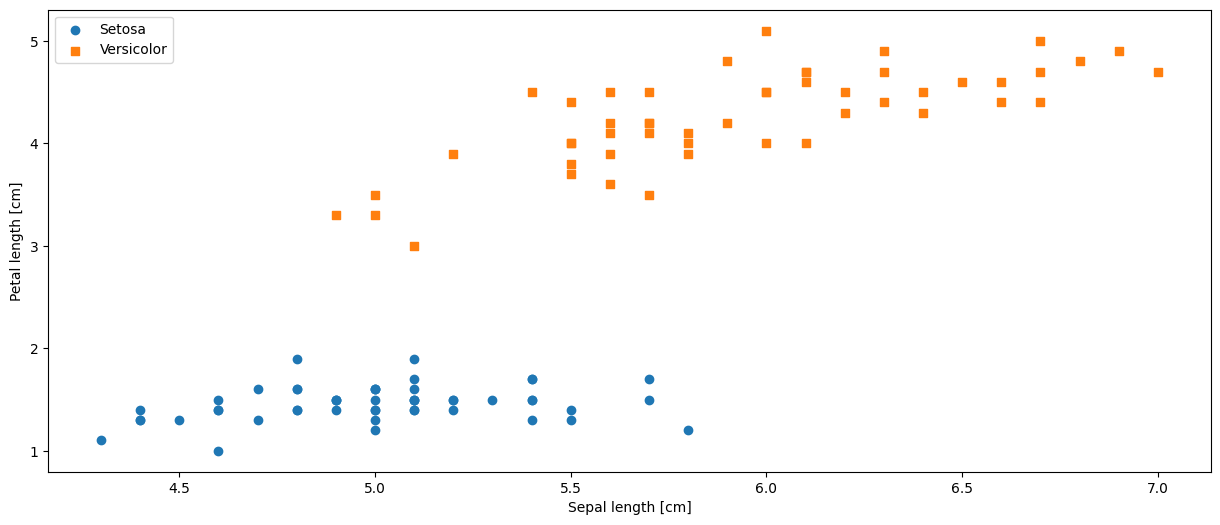

In [ ]:
# chapter2_iris_visualization 과 똑같이 데이터를 읽어와보자
# df.tail() 로 데이터를 대충 확인한 후,
y = df.iloc[0:100,4].to_numpy()
y = np.where( y == 'Iris-setosa', 0, 1)
X = df.iloc[0:100, [0,2]].to_numpy()

fig, ax = plt.subplots(figsize = (15,6))
markers = ('o','s')
labels = ('Setosa', 'Versicolor')
for idx, c in enumerate(np.unique(y)):
  mask = ( y == c )
  ax.scatter(X[mask,0], X[mask, 1], marker = markers[idx], label = labels[idx])

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

## Optional
AdalineGD 가 제대로 구현되었는지 확인해보자

In [ ]:
ada = AdalineGD(eta = 0.1)
ada.fit(X,y)
print(ada.losses_)
print(len(ada.losses_))

[0.4464723396750294, 14.3466559992542, 718.0109711330099, 36191.407620657475, 1824400.376269131, 91967710.17854804, 4636076584.128363, 233703829940.27634, 11780970210018.865, 593876699088886.2, 2.993722311773396e+16, 1.5091303116892357e+18, 7.607500163601138e+19, 3.8349278581788167e+21, 1.9331805929892116e+23, 9.745130399623437e+24, 4.912503614513312e+26, 2.476384693994332e+28, 1.2483413008657823e+30, 6.292867207694181e+31, 3.1722236271609557e+33, 1.5991125203491258e+35, 8.061098942844438e+36, 4.0635862292004735e+38, 2.0484468878533642e+40, 1.0326185826212277e+42, 5.205412664089552e+43, 2.6240396463408413e+45, 1.3227739105239388e+47, 6.668080723562047e+48, 3.361368120598041e+50, 1.694459936912262e+52, 8.541743643626492e+53, 4.3058784031440643e+55, 2.1705859595185495e+57, 1.0941886803442616e+59, 5.515786476657555e+60, 2.780498555926035e+62, 1.4016445800113148e+64, 7.065666423339642e+65, 3.5617903937891437e+67, 1.7954924630155873e+69, 9.051046884643344e+70, 4.5626172983440005e+72, 2.3000

# Draw plots

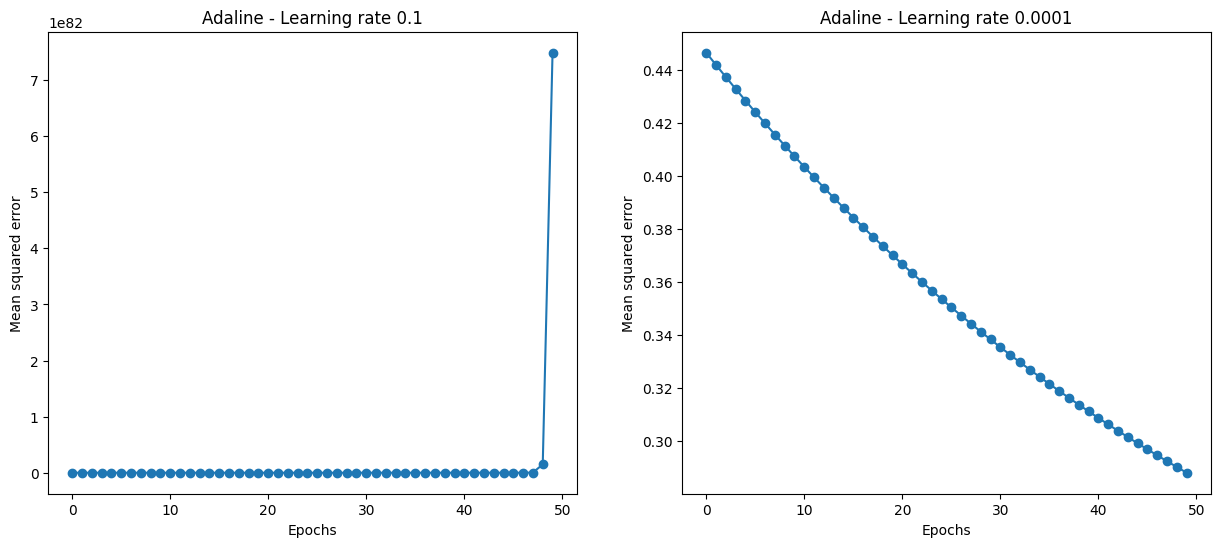

In [ ]:
# 두 learning rate에 대해, 에포크 횟수 대비 손실 함수의 값을 line plot으로 그려보자
fig, axs = plt.subplots(1,2, figsize = (15,6))
learning_rates = (1e-1, 1e-4)
n_iter = 50
for idx,lr in enumerate(learning_rates):
  ada = AdalineGD(eta = lr, n_iter = n_iter)
  ada.fit(X,y)
  axs[idx].plot( np.arange(n_iter), ada.losses_, marker = 'o')
  axs[idx].set_title(f'Adaline - Learning rate {lr}')
  axs[idx].set_xlabel('Epochs')
  axs[idx].set_ylabel('Mean squared error')
plt.show()

[0.4464723396750294, 14.3466559992542, 718.0109711330099, 36191.407620657475, 1824400.376269131, 91967710.17854804, 4636076584.128363, 233703829940.27634, 11780970210018.865, 593876699088886.2, 2.993722311773396e+16, 1.5091303116892357e+18, 7.607500163601138e+19, 3.8349278581788167e+21, 1.9331805929892116e+23, 9.745130399623437e+24, 4.912503614513312e+26, 2.476384693994332e+28, 1.2483413008657823e+30, 6.292867207694181e+31, 3.1722236271609557e+33, 1.5991125203491258e+35, 8.061098942844438e+36, 4.0635862292004735e+38, 2.0484468878533642e+40, 1.0326185826212277e+42, 5.205412664089552e+43, 2.6240396463408413e+45, 1.3227739105239388e+47, 6.668080723562047e+48, 3.361368120598041e+50, 1.694459936912262e+52, 8.541743643626492e+53, 4.3058784031440643e+55, 2.1705859595185495e+57, 1.0941886803442616e+59, 5.515786476657555e+60, 2.780498555926035e+62, 1.4016445800113148e+64, 7.065666423339642e+65, 3.5617903937891437e+67, 1.7954924630155873e+69, 9.051046884643344e+70, 4.5626172983440005e+72, 2.3000

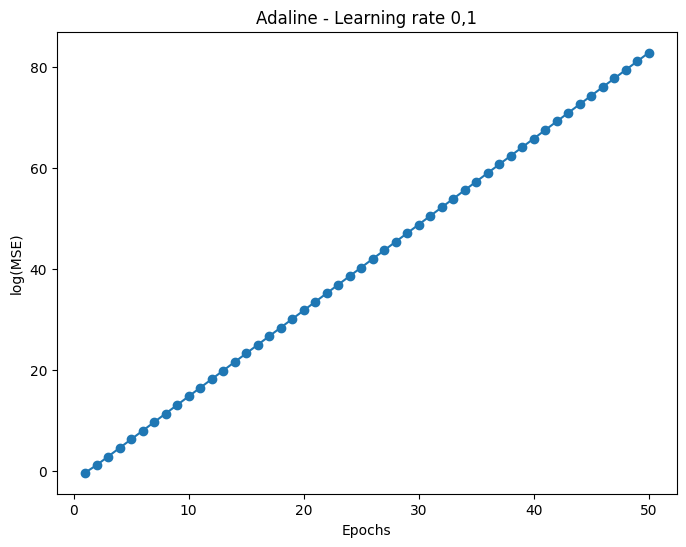

In [ ]:
# plot을 통해서 볼 수 있듯이, learning rate가 0.1일때 일부 outlier때문에 초반 epoch때의 MSE를 살펴보기 어렵다
# 그러므로, lr=0.1인 모델은 log을 씌워보자 (상용로그)
# 또한, epoch이 0인건 이상하니까, 1부터 시작하도록 해보자
fig,ax = plt.subplots(figsize = (8,6))
ada = AdalineGD(eta = 0.1, n_iter = 50)
ada.fit(X,y)
print(ada.losses_)
ax.plot( range(1, len(ada.losses_) + 1), np.log10(ada.losses_), marker = 'o')
ax.set_title('Adaline - Learning rate 0,1')
ax.set_ylabel('log(MSE)')
ax.set_xlabel('Epochs')
plt.show()

# 특정 스케일을 조정하여 경사 하강법 결과 향상

In [ ]:
# 넘파이 내장함수 `mean` 과 `std`로 간단하게 표준화를 진행해보자
X.shape
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - np.mean(X[:,0])) / np.std(X[:,0])
X_std[:,1] = (X[:,1] - np.mean(X[:,1])) / np.std(X[:,1])
print(X[:,0])
print(X_std[:,0])


[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7]
[-0.5810659  -0.89430898 -1.20755205 -1.36417359 -0.73768744 -0.11120129
 -1.36417359 -0.73768744 -1.67741667 -0.89430898 -0.11120129 -1.05093052
 -1.05093052 -1.8340382   0.51528486  0.35866332 -0.11120129 -0.5810659
  0.35866332 -0.5810659  -0.11120129 -0.5810659  -1.36417359 -0.5810659
 -1.05093052 -0.73768744 -0.73768744 -0.42444437 -0.42444437 -1.20755205
 -1.05093052 -0.11120129 -0.42444437  0.04542025 -0.89430898 -0.73768744
  0.04542025 -0.89430898 -1.67741667 -0.5810659  -0.73768744 -1.52079513
 -1.67741667 -0.73768744 -0.5810659  -1.05093052 -0.5810659  -1.36417359
 -0.26782283

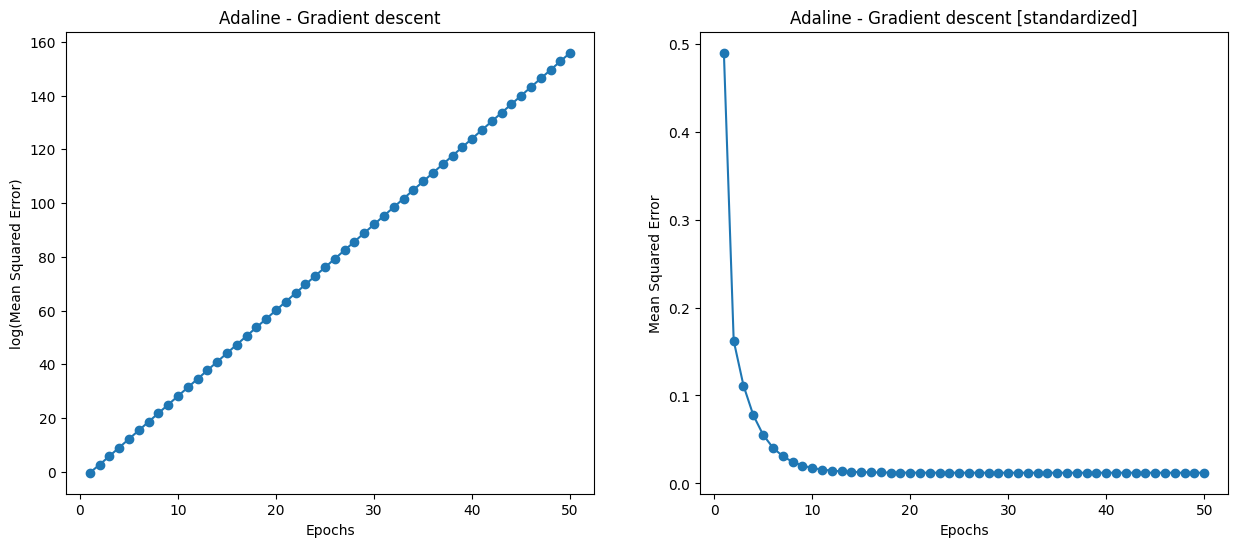

In [ ]:
# 이제 표준화한 데이터셋을 가지고, lr = 0.5에서 몇번의 에포크 만에 수렴하는지 확인해보자
# 기존 데이터셋과도 비교해보자
fig, axs = plt.subplots( 1,2, figsize = (15,6))
ada = AdalineGD(eta = 0.5, n_iter = 50)
ada.fit(X,y)
axs[0].plot( range(1, len(ada.losses_) + 1), np.log10(ada.losses_), marker = 'o')
axs[0].set_title('Adaline - Gradient descent')
axs[0].set_ylabel('log(Mean Squared Error)')
axs[0].set_xlabel('Epochs')

ada.fit(X_std,y)
axs[1].plot( range(1, len(ada.losses_) + 1), ada.losses_, marker = 'o')
axs[1].set_title('Adaline - Gradient descent [standardized]')
axs[1].set_ylabel('Mean Squared Error')
axs[1].set_xlabel('Epochs')
plt.show()

# standardization을 진행하면, 원래는 발산하는 learning rate를 가지고도 수렴할 수 있음을 보여준다

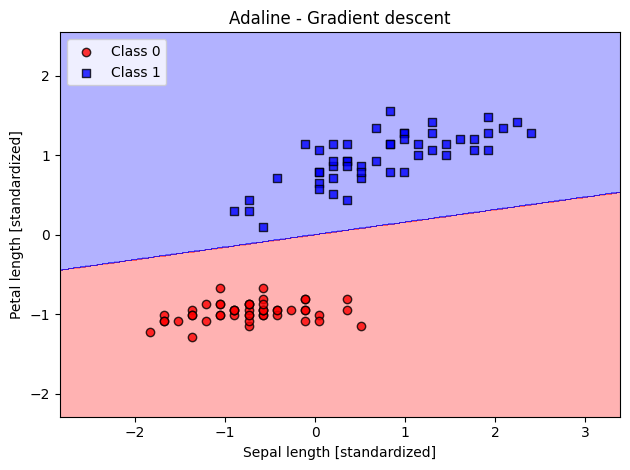

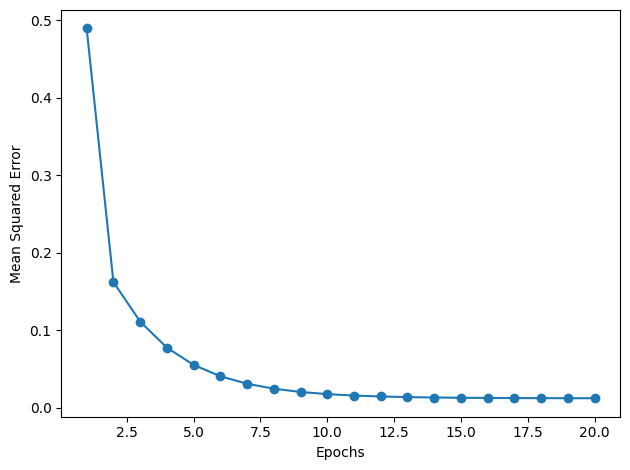

In [ ]:
# 저번처럼 decision boundary를 한번그려보자
# 추가적으로 epoch에 따른 loss도 그려보자
ada = AdalineGD(eta = 0.5, n_iter = 20)
ada.fit(X_std,y)
plot_decision_boundary(X_std, y, ada)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

plt.plot( range( 1, len(ada.losses_) + 1), ada.losses_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()

# Stochastic gradient descent & Mini-batch gradienet descent

In [86]:
# 우선 stochstic gradient descent를 반영한 adaline을 구현한후, import 해보자
# 추가되는 매개변수 및 methods
# 1. shuffle : bool
#              True로 설정하면 같은 반복이 되지 않도록 epoch마다 훈련 데이터를 shuffle 함
# 2. partial_fit:
#              가중치를 다시 초기화하지 않고 훈련 데이터를 학습시킴 (online learning 을 위해)
from classifiers.adaline_stochastic import AdalineSGD

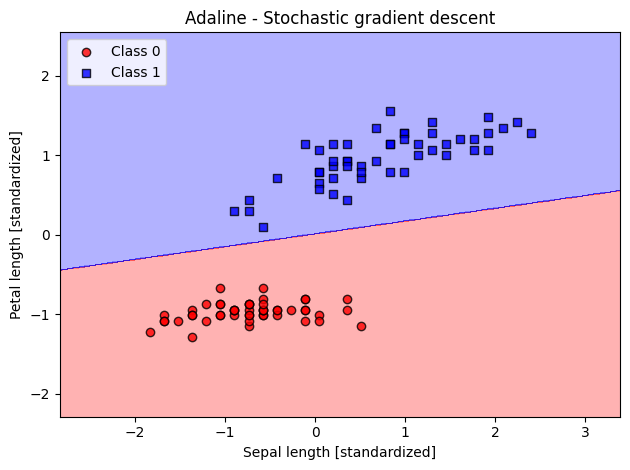

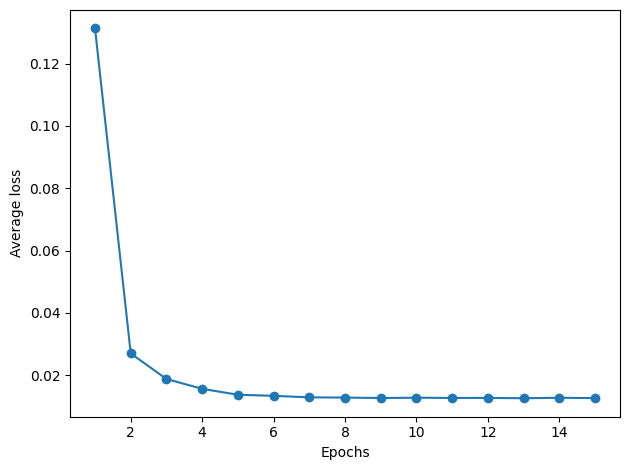

In [88]:
ada_sgd = AdalineSGD(n_iter = 15, eta = 0.01, random_state = 1)
ada_sgd.fit(X_std,y)

plot_decision_boundary(X_std, y, ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.ylabel('Petal length [standardized]')
plt.xlabel('Sepal length [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.losses_)+1), ada_sgd.losses_, marker = 'o')
plt.ylabel('Average loss')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

## SGD vs GD
평균 손실이 일반 GD보다 상당히 빠르게 감소했다는 사실을 알 수 있다.  
